# Coronavirus Disease 2019 Outbreak - COVID-19

## File Information and Author

# ----------------------------------------------
### HEADER COMMENTS
### TEAM PROJECT 1
### DATE APRIL 25, 2020
### MODULE AUTHOR Rob Gauer
### FILE NAME 'Team6_Project1_Charts_MN-MI-CO-NatAvg.ipynb'
# ----------------------------------------------

## The technical requirements for Project 1 are as follows

##### [x] Use Pandas to clean and format your data set(s).
#####        Documented within entire notebook.
##### [x] Create a Jupyter Notebook describing the data exploration and cleanup process. 
#####        Documented within notebook.
#####        * See Section called 'Program Reads CSV Files from Output_Data & Creates DataFrames'.
#####        * See Section called 'Program Reads CSV Files from Output_Data & Creates DataFrames'. 
##### [x] Create a Jupyter Notebook illustrating the final data analysis.
#####        Documented within notebook.
#####        * See section called 'Charting'.
##### [x] Use Matplotlib to create a total of 6-8 visualizations of your data.
#####        i.e. (ideally, at least 2 per "question" you ask of your data).
#####        * Documented within notebook. 
#####        * See section called 'Charting'.
##### [x] Save PNG images of your visualizations to distribute to the class and instructional team, and for inclusion in your presentation.
#####        * Chart files saved to Team6 GITHUB 'Images' folder.
##### [x] Optionally, use at least one API, if you can find an API with data pertinent to your primary research questions.
#####        * Code uses API calls to generate 'Output_Data' csv files. 
#####        * File called: Team6Project1Py.ipynb #Run this file first and then you can run in any order the other code programs.
##### [x] Create a write-up summarizing your major findings. This should include a heading for each "question" you asked of your data, and under each heading, a short description of what you found and any relevant plots.
#####        * See each Chart (presentation slide) below for write up summation.
##### See Jupyter Notebook for write up/mark up called: Team6_ProjectPy-Summary.ipynb

# Project Tasks Outline

## Looking to understand how the COVID-19 pandemic is impacting the state of Minnesota based on the following criteria: Total Population, Testing, Hospitalization, and Death Rate.
##### Minnesota versus National Average.
##### Minnesota versus a similar size state population.
##### Minnesota population center density versus another states similar population center. To be defined as a comparitive city/county versus similar population state city/county. We have chosen Hennepin and Ramsey counties which contain the cities of Minneapolis and St.Paul.
##### Criteria: 
##### A. Total Population
##### B. Testing
##### C. Hospitalization
##### E. Death Rate.
##### High Level Overview Outline:
##### 1. County analysis - wayne county MI vs Henn and ramsey *Phil
##### 2. State analysis - Mn vs Mi vs. Co. vs. National  *Rob
##### 3. Other Charts - tbd? Experiment with a county/state size map. *Ian

## Dependancies and Setup

In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np
import requests
import gmaps
import os
import json
import sys
from census import Census
#import datetime

# API keys file load location
sys.path.insert(0, "/Users/rober/Desktop/ClassHomework/keys")

# Census API Key
from project1_config import (api_key, gkey)
c = Census(api_key, year=2018)

# gmaps API Key 
gmaps.configure(api_key=gkey)

# define current date string to append to the names of output files...
import datetime  
def _getToday(): return datetime.date.today().strftime("%Y%m%d")   

## Clean Up Tasks - Program Removal of Previous Chart Image Files

In [2]:
## Prepare Read/Write File Structure by Removal of previous Charts. 

# Once written the 'png' files will not be overwriten with new data unless you remove the old files first. 
# This process accomplishes the old file version removal so new files can be written to the 'Images' folder.

# Delete previous chart files from folder called 'Images'... # Cleanup task - Expectation all files exist. 
#---------------
try:
    os.remove("Images/COVID_19_US_SUMMARY_of_Hospitalized_Recovered_versus_Deaths.png") 
    os.remove("Images/COVID_19_US_SUMMARY_of_TotalTests_Positive_versus_Negative_Results.png") 
    os.remove("Images/COVID_19_US_SUMMARY_of_StatePopulation_TotalTested_versus_Deaths.png") 
    os.remove("Images/COVID_19_MN_MI_CO_SUMMARY_of_Hospitalized_Recovered_versus_Deaths_b.png") 
    os.remove("Images/COVID_19_MN_MI_CO_SUMMARY_of_TotalTests_Positive_versus_Negative_Results_b.png") 
    os.remove("Images/COVID_19_MN_MI_CO_SUMMARY_of_StatePopulation_TotalTested_versus_Deaths_b.png") 
    os.remove("Images/COVID_19_MN_MI_CO_Summary_Comparision.png") 
    os.remove("Images/COVID_19_MN_MI_CO_Summary_Comparision_Tests_Positive_Negative.png") 
    os.remove("Images/COVID_19_MN_MI_CO_Summary_Comparision_hospital_recovered_death.png") 
    #---------------
    print("") #Print to terminal message...
    print("------------------------------------------------------------------")
    print("Files Deleted from folder called: 'Images'. Cleanup task complete.")
    print("------------------------------------------------------------------")
    print("")
    #---------------
except FileNotFoundError:
    print("") #Print to terminal message...
    print("----------------------------------------")    
    print("No files to remove, program continues...")
    print("----------------------------------------")
    print("")


------------------------------------------------------------------
Files Deleted from folder called: 'Images'. Cleanup task complete.
------------------------------------------------------------------



## Program Reads CSV Files from Output_Data & Creates DataFrames

In [3]:
## SECTION:  All data files are read from source location and DataFrames are created within this section...

# Importing csv files for charting...  
#       (Phil) Code uses API calls to generate 'Output_Data' csv files, file called: Team6Project1Py.ipynb

In [4]:
## Read Data Files & Create DataFrames

# Create dataframes...
#---------------
#Census_County_Population="../Output_Data/Census_County_Population.csv"
Census_County_Population = "%s_%s.%s" % ("Output_Data/Census_County_Population", _getToday(),"csv")
Census_County_Population_df=pd.read_csv(Census_County_Population)
#---------------
#Census_State_Population='../Output_Data/Census_State_Population.csv'
Census_State_Population = "%s_%s.%s" % ("Output_Data/Census_State_Population", _getToday() ,"csv")
Census_State_Population_df=pd.read_csv(Census_State_Population)
#---------------
#COV_Tracking_MN_History_data='../Output_Data/COV_Tracking_MN_History_data.csv'
COV_Tracking_MN_History_data = "%s_%s.%s" % ("Output_Data/COV_Tracking_MN_History_data", _getToday() ,"csv")
COV_Tracking_MN_History_data_df=pd.read_csv(COV_Tracking_MN_History_data)
#---------------
#COV_Tracking_MN_Summary_data='../Output_Data/COV_Tracking_MN_Summary_data.csv'
COV_Tracking_MN_Summary_data = "%s_%s.%s" % ("Output_Data/COV_Tracking_MN_Summary_data", _getToday() ,"csv")
COV_Tracking_MN_Summary_data_df=pd.read_csv(COV_Tracking_MN_Summary_data)
#---------------
#COV_Tracking_US_History_data='../Output_Data/COV_Tracking_US_History_data.csv'
COV_Tracking_US_History_data = "%s_%s.%s" % ("Output_Data/COV_Tracking_US_History_data", _getToday() ,"csv")
COV_Tracking_US_History_data_df=pd.read_csv(COV_Tracking_US_History_data)
#---------------
#COV_Tracking_US_Summary_data='Output_Data/COV_Tracking_US_Summary_data.csv'
COV_Tracking_US_Summary_data = "%s_%s.%s" % ("Output_Data/COV_Tracking_US_Summary_data", _getToday() ,"csv")
COV_Tracking_US_Summary_data_df=pd.read_csv(COV_Tracking_US_Summary_data)
#---------------
#revised_jhu_data='../Output_Data/JHU_data.csv'
jhu_data = "%s_%s.%s" % ("Output_Data/JHU_data", _getToday() ,"csv")
JHU_data_df=pd.read_csv(jhu_data)
#---------------

## Display DataFrames & Prepare DataFrames for Charting 

In [5]:
## SECTION:  All DataFrames are reviewed and prepared for use within this section...

In [6]:
## CENSUS STATE POPULATION DATAFRAME

# Display dataframe and reorganize columns for readability
Census_State_Population_df=Census_State_Population_df.rename(columns={'Population':'State Population','Abbreviation':'State Abbreviation'})
Census_State_Population_df=Census_State_Population_df[['State','State Abbreviation','State Population']]

# Display dataframe - first five records...
Census_State_Population_df.head()

,State,State Abbreviation,State Population
0,Minnesota,MN,5527358.0
1,Mississippi,MS,2988762.0
2,Missouri,MO,6090062.0
3,Montana,MT,1041732.0
4,Nebraska,NE,1904760.0


In [7]:
# Display record counts
Census_State_Population_df.count()

State                 51
State Abbreviation    51
State Population      51
dtype: int64

In [8]:
## CENSUS COUNTY POPULATION DATAFRAME

# Display dataframe and reorganize columns for readability# Display dataframe and reorganize columns for readability
Census_County_Population_df=Census_County_Population_df.rename(columns={'Population':'County Population','Abbreviation':'State Abbreviation'})
Census_County_Population_df=Census_County_Population_df[['State','State Abbreviation','County','County Population']]
# Display dataframe - first five records...
Census_County_Population_df.head()

,State,State Abbreviation,County,County Population
0,Mississippi,MS,Washington,47086.0
1,Mississippi,MS,Perry,12028.0
2,Mississippi,MS,Choctaw,8321.0
3,Mississippi,MS,Itawamba,23480.0
4,Mississippi,MS,Carroll,10129.0


In [9]:
# Display record counts
Census_County_Population_df.count()

State                 3142
State Abbreviation    3142
County                3142
County Population     3142
dtype: int64

In [10]:
## COV TRACKING MN HISTORY DATAFRAME

# List dataframe columns.
COV_Tracking_MN_History_data_df.columns

Index(['Date', 'State', 'Positive', 'Negative', 'Recovered', 'Date_Checked',
       'Death', 'Hospitalized', 'Total_Test_Results', 'Death_Increase',
       'Hospitalized_Increase', 'Negative_Increase', 'Positive_Increase',
       'Total_Test_Results_Increase'],
      dtype='object')

In [11]:
# Display dataframe, cleanup NAN, rows not needed, and reorganize columns for readability

# Rename column headers
COV_Tracking_MN_History_data_df=COV_Tracking_MN_History_data_df.rename(columns={'State':'State Abbreviation','Date':'File Date','States':'State ID'})
# Merge dataframes
COV_Tracking_MN_History_data_df=pd.merge(COV_Tracking_MN_History_data_df,Census_State_Population_df, on='State Abbreviation',how='left')
# Reorganize the column headers
COV_Tracking_MN_History_data_df=COV_Tracking_MN_History_data_df[['File Date','State','State Abbreviation','State Population','Positive','Negative','Total_Test_Results','Hospitalized','Recovered','Death','Date_Checked']]
# Eliminate 'State' rows with NaN values
COV_Tracking_MN_History_data_df.dropna(subset=['State'], inplace=True)
#COV_Tracking_MN_History_data_df
# Replace NaN values with (0)s
COV_Tracking_MN_History_data_df.fillna(0, inplace=True)
#COV_Tracking_MN_History_data_df
# Display dataframe - first five records...
COV_Tracking_MN_History_data_df.head()

,File Date,State,State Abbreviation,State Population,Positive,Negative,Total_Test_Results,Hospitalized,Recovered,Death,Date_Checked
0,20200424,Minnesota,MN,5527358.0,3185,50602,53787,756.0,1594.0,221.0,2020-04-24T20:00:00Z
1,20200423,Minnesota,MN,5527358.0,2942,48606,51548,712.0,1536.0,200.0,2020-04-23T20:00:00Z
2,20200422,Minnesota,MN,5527358.0,2721,46623,49344,660.0,1317.0,179.0,2020-04-22T20:00:00Z
3,20200421,Minnesota,MN,5527358.0,2567,45130,47697,629.0,1254.0,160.0,2020-04-21T20:00:00Z
4,20200420,Minnesota,MN,5527358.0,2470,44380,46850,602.0,1202.0,143.0,2020-04-20T20:00:00Z


In [12]:
# Display record counts
COV_Tracking_MN_History_data_df.count()

File Date             50
State                 50
State Abbreviation    50
State Population      50
Positive              50
Negative              50
Total_Test_Results    50
Hospitalized          50
Recovered             50
Death                 50
Date_Checked          50
dtype: int64

In [13]:
## COV TRACKING US HISTORY DATAFRAME

# List dataframe columns.
COV_Tracking_US_History_data_df.columns

Index(['Date', 'States', 'Positive', 'Negative', 'Recovered', 'Date_Checked',
       'Death', 'Hospitalized', 'Total_Test_Results', 'Death_Increase',
       'Hospitalized_Increase', 'Negative_Increase', 'Positive_Increase',
       'Total_Test_Results_Increase'],
      dtype='object')

In [14]:
# Display dataframe, cleanup NAN, rows not needed, and reorganize columns for readability

# Rename column headers
COV_Tracking_US_History_data_df=COV_Tracking_US_History_data_df.rename(columns={'Date':'File Date','States':'State ID'})
# Merge dataframes
COV_Tracking_US_History_data_df=pd.merge(COV_Tracking_US_History_data_df,Census_State_Population_df, left_on='State ID',right_index=True)
# Reorganize column headers
COV_Tracking_US_History_data_df=COV_Tracking_US_History_data_df[['File Date','State','State Abbreviation','State Population','Positive','Negative','Total_Test_Results','Hospitalized','Recovered','Death','Date_Checked','State ID']]
# Eliminate 'State' rows with NaN values
COV_Tracking_US_History_data_df.dropna(subset=['State'], inplace=True)
#COV_Tracking_US_History_data_df
# Replace NaN values with (0)s
COV_Tracking_US_History_data_df.fillna(0, inplace=True)
#COV_Tracking_US_History_data_df
# Display dataframe - first five records...
COV_Tracking_US_History_data_df.head()

,File Date,State,State Abbreviation,State Population,Positive,Negative,Total_Test_Results,Hospitalized,Recovered,Death,Date_Checked,State ID
49,20200306,Florida,FL,20598139.0,395,1588.0,1983,0.0,0.0,26.0,2020-03-06T21:00:00Z,37
50,20200305,Washington,WA,7294336.0,277,970.0,1247,0.0,0.0,20.0,2020-03-05T21:00:00Z,25
51,20200304,Rhode Island,RI,1056611.0,209,759.0,968,0.0,0.0,16.0,2020-03-04T21:00:00Z,16
52,20200303,Montana,MT,1041732.0,94,6.0,100,0.0,0.0,14.0,2020-03-03T21:00:00Z,3
53,20200302,Montana,MT,1041732.0,53,0.0,53,0.0,0.0,11.0,2020-03-02T21:00:00Z,3


In [15]:
# Display record counts
COV_Tracking_US_History_data_df.count()

File Date             45
State                 45
State Abbreviation    45
State Population      45
Positive              45
Negative              45
Total_Test_Results    45
Hospitalized          45
Recovered             45
Death                 45
Date_Checked          45
State ID              45
dtype: int64

In [16]:
## COV TRACKING MN SUMMARY DATAFRAME

# Display dataframe, cleanup NAN, rows not needed, and reorganize columns for readability

# Rename column headers
COV_Tracking_MN_Summary_data_df=COV_Tracking_MN_Summary_data_df.rename(columns={'State':'State Abbreviation'})
# Merge dataframes
COV_Tracking_MN_Summary_data_df=pd.merge(COV_Tracking_MN_Summary_data_df,Census_State_Population_df, on='State Abbreviation', how='left')
# Reorganize column headers
COV_Tracking_MN_Summary_data_df=COV_Tracking_MN_Summary_data_df[['State','State Abbreviation','State Population','Positive','Negative','Total_Test_Results','Hospitalized','Recovered','Death','Date_Checked']]
# Display dataframe - first five records...
COV_Tracking_MN_Summary_data_df.head()

,State,State Abbreviation,State Population,Positive,Negative,Total_Test_Results,Hospitalized,Recovered,Death,Date_Checked
0,Minnesota,MN,5527358.0,3185,50602,53787,756,1594,221,2020-04-24T21:03:00Z


In [17]:
## COV TRACKING US SUMMARY DATAFRAME

# Display dataframe, cleanup NAN, rows not needed, and reorganize columns for readability

# Rename column headers
COV_Tracking_US_Summary_data_df=COV_Tracking_US_Summary_data_df.rename(columns={'State':'State Abbreviation'})
# Merge dataframes
COV_Tracking_US_Summary_data_df=pd.merge(COV_Tracking_US_Summary_data_df,Census_State_Population_df, on='State Abbreviation', how='left')
# Reorganize column headers
COV_Tracking_US_Summary_data_df=COV_Tracking_US_Summary_data_df[['State','State Abbreviation','State Population','Positive','Negative','Total_Test_Results','Hospitalized','Recovered','Death','Date_Checked']]
# Eliminate 'State' rows with NaN values
COV_Tracking_US_Summary_data_df.dropna(subset=['State'], inplace=True)
#COV_Tracking_US_Summary_data_df
# Replace NaN values with (0)s
COV_Tracking_US_Summary_data_df.fillna(0, inplace=True)
#COV_Tracking_US_Summary_data_df
# Display dataframe - first five records...
COV_Tracking_US_Summary_data_df

,State,State Abbreviation,State Population,Positive,Negative,Total_Test_Results,Hospitalized,Recovered,Death,Date_Checked
0,Alaska,AK,738516.0,339,11942,12281,0.0,208.0,9,2020-04-24T20:02:00Z
1,Alabama,AL,4864680.0,6026,46863,52889,769.0,0.0,209,2020-04-25T02:17:00Z
2,Arkansas,AR,2990671.0,2741,32837,35578,291.0,929.0,45,2020-04-24T19:42:00Z
3,Arizona,AZ,6946685.0,6045,54669,60714,984.0,1313.0,266,2020-04-24T19:39:00Z
4,California,CA,39148760.0,39254,454919,494173,0.0,0.0,1562,2020-04-25T02:06:00Z
5,Colorado,CO,5531141.0,12256,44533,56789,2366.0,0.0,674,2020-04-25T02:32:00Z
6,Connecticut,CT,3581504.0,23921,50117,74038,0.0,0.0,1764,2020-04-24T21:03:00Z
7,District of Columbia,DC,684498.0,3528,13005,16533,0.0,651.0,153,2020-04-24T20:11:00Z
8,Delaware,DE,949495.0,3442,13937,17379,0.0,703.0,100,2020-04-25T03:01:00Z
9,Florida,FL,20598139.0,30533,288505,319038,5009.0,0.0,1066,2020-04-25T02:54:00Z


In [18]:
# Display record counts
COV_Tracking_US_Summary_data_df.count()

State                 51
State Abbreviation    51
State Population      51
Positive              51
Negative              51
Total_Test_Results    51
Hospitalized          51
Recovered             51
Death                 51
Date_Checked          51
dtype: int64

In [19]:
## JHU DATAFRAME

# Display dataframe, cleanup NAN, rows not needed, and reorganize columns for readability

# Rename column headers
JHU_data_df=JHU_data_df.rename(columns={'Admin2':'County','Abbreviation':'State Abbreviation','Combined_Key':'CityStateRegion'})
JHU_data_df=JHU_data_df[['State','State Abbreviation','County','Confirmed','Recovered','Active','Deaths','Last_Update','FIPS','Lat','Long_','CityStateRegion','Country_Region']]
# Display dataframe - first five records...
JHU_data_df.head()

,State,State Abbreviation,County,Confirmed,Recovered,Active,Deaths,Last_Update,FIPS,Lat,Long_,CityStateRegion,Country_Region
0,South Carolina,SC,Abbeville,23,0,23,0,4/24/2020 3:30,45001.0,34.223334,-82.461707,"Abbeville, South Carolina, US",US
1,Virginia,VA,Accomack,76,0,74,2,4/24/2020 3:30,51001.0,37.767072,-75.632346,"Accomack, Virginia, US",US
2,Idaho,ID,Ada,635,0,621,14,4/24/2020 3:30,16001.0,43.452658,-116.241552,"Ada, Idaho, US",US
3,Iowa,IA,Adair,1,0,1,0,4/24/2020 3:30,19001.0,41.330756,-94.471059,"Adair, Iowa, US",US
4,Kentucky,KY,Adair,63,0,58,5,4/24/2020 3:30,21001.0,37.104598,-85.281297,"Adair, Kentucky, US",US


In [20]:
# Display record counts
JHU_data_df.count()

State                 2665
State Abbreviation    2665
County                2665
Confirmed             2665
Recovered             2665
Active                2665
Deaths                2665
Last_Update           2665
FIPS                  2665
Lat                   2665
Long_                 2665
CityStateRegion       2665
Country_Region        2665
dtype: int64

In [21]:
## SIMILAR STATES COMPARISON DATAFRAMES

# Create new dataframe for isolating states for comparison charting
States_MNMICO_df=COV_Tracking_US_Summary_data_df
#States_MNMICO_df=States_MNMICO_df.set_index("State") # NO DO NOT SET THIS...
States_MNMICO_df.head()

,State,State Abbreviation,State Population,Positive,Negative,Total_Test_Results,Hospitalized,Recovered,Death,Date_Checked
0,Alaska,AK,738516.0,339,11942,12281,0.0,208.0,9,2020-04-24T20:02:00Z
1,Alabama,AL,4864680.0,6026,46863,52889,769.0,0.0,209,2020-04-25T02:17:00Z
2,Arkansas,AR,2990671.0,2741,32837,35578,291.0,929.0,45,2020-04-24T19:42:00Z
3,Arizona,AZ,6946685.0,6045,54669,60714,984.0,1313.0,266,2020-04-24T19:39:00Z
4,California,CA,39148760.0,39254,454919,494173,0.0,0.0,1562,2020-04-25T02:06:00Z


In [22]:
# Display record counts
States_MNMICO_df.count()

State                 51
State Abbreviation    51
State Population      51
Positive              51
Negative              51
Total_Test_Results    51
Hospitalized          51
Recovered             51
Death                 51
Date_Checked          51
dtype: int64

In [23]:
# Isolate states for comparision charting
state_columns_df=States_MNMICO_df.loc[(States_MNMICO_df['State']=="Minnesota")
                                      |(States_MNMICO_df["State"]=="Michigan")
                                      |(States_MNMICO_df["State"]=="Colorado")]
state_columns_df

,State,State Abbreviation,State Population,Positive,Negative,Total_Test_Results,Hospitalized,Recovered,Death,Date_Checked
5,Colorado,CO,5531141.0,12256,44533,56789,2366.0,0.0,674,2020-04-25T02:32:00Z
22,Michigan,MI,9957488.0,36641,99655,136296,0.0,3237.0,3085,2020-04-24T20:17:00Z
23,Minnesota,MN,5527358.0,3185,50602,53787,756.0,1594.0,221,2020-04-24T21:03:00Z


In [24]:
# Display record counts             
state_columns_df.count()

State                 3
State Abbreviation    3
State Population      3
Positive              3
Negative              3
Total_Test_Results    3
Hospitalized          3
Recovered             3
Death                 3
Date_Checked          3
dtype: int64

In [25]:
# Query COV_Tracking_US_History_data table for history records for Minnesota, Michigan, and Colorado. No records exist.
MNMICO_df=COV_Tracking_US_History_data_df.loc[(COV_Tracking_US_History_data_df["State"]=="Minnesota")
                                      |(COV_Tracking_US_History_data_df["State"]=="Michigan")
                                      |(COV_Tracking_US_History_data_df["State"]=="Colorado")]
MNMICO_df             

,File Date,State,State Abbreviation,State Population,Positive,Negative,Total_Test_Results,Hospitalized,Recovered,Death,Date_Checked,State ID


In [26]:
COV_Tracking_US_Summary_data_df.head()

,State,State Abbreviation,State Population,Positive,Negative,Total_Test_Results,Hospitalized,Recovered,Death,Date_Checked
0,Alaska,AK,738516.0,339,11942,12281,0.0,208.0,9,2020-04-24T20:02:00Z
1,Alabama,AL,4864680.0,6026,46863,52889,769.0,0.0,209,2020-04-25T02:17:00Z
2,Arkansas,AR,2990671.0,2741,32837,35578,291.0,929.0,45,2020-04-24T19:42:00Z
3,Arizona,AZ,6946685.0,6045,54669,60714,984.0,1313.0,266,2020-04-24T19:39:00Z
4,California,CA,39148760.0,39254,454919,494173,0.0,0.0,1562,2020-04-25T02:06:00Z


In [27]:
## CALCULATE THE MEANS of DATAFRAME COVID_Tracking_US_Summary_data_df. 
## Display means for key columns...

#Calculate the US States Mean values for each key data column...
states_population_mean=COV_Tracking_US_Summary_data_df['State Population'].mean()
states_positive_mean=COV_Tracking_US_Summary_data_df['Positive'].mean()
states_negative_mean=COV_Tracking_US_Summary_data_df['Negative'].mean()
states_total_test_results_mean=COV_Tracking_US_Summary_data_df['Total_Test_Results'].mean()
states_hospitalized_mean=COV_Tracking_US_Summary_data_df['Hospitalized'].mean()
states_recovered_mean=COV_Tracking_US_Summary_data_df['Recovered'].mean()
states_death_mean=COV_Tracking_US_Summary_data_df['Death'].mean()

# Display the Means...
print("States Population Mean .......... =",states_population_mean)
print("States Positive Mean ............ =",states_positive_mean)
print("States Negative Mean ............ =",states_negative_mean)
print("States Total Test Results Mean .. =",states_total_test_results_mean)
print("States Hospitalized Mean ........ =",states_hospitalized_mean)
print("States Recovered Mean ........... =",states_recovered_mean)
print("States Death Mean ............... =",states_death_mean)

States Population Mean .......... = 6331431.960784313
States Positive Mean ............ = 17603.843137254902
States Negative Mean ............ = 79016.72549019608
States Total Test Results Mean .. = 96620.56862745098
States Hospitalized Mean ........ = 1841.3725490196077
States Recovered Mean ........... = 1593.764705882353
States Death Mean ............... = 904.2549019607843


In [28]:
## US SUMMARY MEANS DATAFRAME 

# Create for using as comparision of States versus National Average.
US_Summary_Means_df=pd.DataFrame({'State Population':[states_population_mean],
                                 "Positive":[states_positive_mean],
                                  "Negative":[states_negative_mean],
                                  "Total Test Results":[states_total_test_results_mean],
                                  "Hospitalized":[states_hospitalized_mean],
                                  "Recovered":[states_recovered_mean],
                                  "Deaths":[states_death_mean]
                                 })
US_Summary_Means_df

,State Population,Positive,Negative,Total Test Results,Hospitalized,Recovered,Deaths
0,6.331432e+06,17603.843137,79016.72549,96620.568627,1841.372549,1593.764706,904.254902


In [29]:
# Merge dataframes
# new_row=['x','y','z']
#df=df.append(new_row)

#COV_Tracking_US_Summary_merge_mean_data_df=pd.merge(COV_Tracking_US_Summary_data_df,US_Summary_Means_df, on='State', how='left')

## Charting

In [30]:
## SECTION:  All Charting is created for use and saved to 'Images' folder within this section...

## CHART: COLOR LEGEND
#    Positive=blue
#    Negative=orange
#    Total Test Results=green
#    Hospitalized=red
#    Recovered=purple
#    Death=brown

## QUESTION: For COVID-19 Nationally
## How does the population of Hospitalized, Recovered, and Deaths compare?

<IPython.core.display.Javascript object>


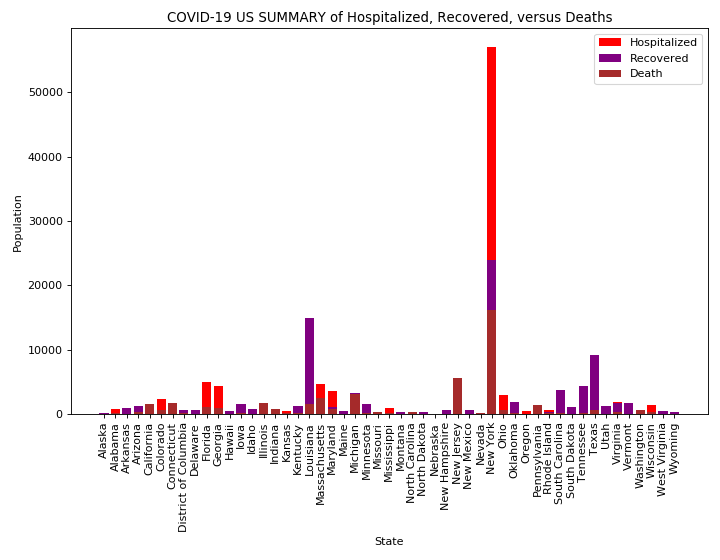

In [31]:
##   ----- PRESENTATION SLIDE -----   ##

## CHART:  COVID-19 US SUMMARY of Hospitalized, Recovered, versus Deaths.

# Set x axis and tick locations
x_axis = np.arange(len(COV_Tracking_US_Summary_data_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(9,7))

#Plot bars...
plt.bar(x_axis, COV_Tracking_US_Summary_data_df["Hospitalized"], color='red', align="center")
plt.xticks(tick_locations, COV_Tracking_US_Summary_data_df["State"], rotation="vertical")
plt.bar(x_axis, COV_Tracking_US_Summary_data_df["Recovered"], color='purple', align="center")
plt.xticks(tick_locations, COV_Tracking_US_Summary_data_df["State"], rotation="vertical")
plt.bar(x_axis, COV_Tracking_US_Summary_data_df["Death"], color='brown', align="center")
plt.xticks(tick_locations, COV_Tracking_US_Summary_data_df["State"], rotation="vertical")

# Set a Title and labels
plt.title("COVID-19 US SUMMARY of Hospitalized, Recovered, versus Deaths")
plt.xlabel("State")
plt.ylabel("Population")
plt.legend(["Hospitalized","Recovered", "Death"], loc='upper right')
#plt.grid()
#plt.yscale("log")

# Save chart to file 
plt.savefig("Images/COVID_19_US_SUMMARY_of_Hospitalized_Recovered_versus_Deaths.png") 

# Display figure
plt.show()
plt.tight_layout()

## QUESTION: For COVID-19 Nationally
## How does the population of Total Test Results, Positive, and Negative compare?

<IPython.core.display.Javascript object>


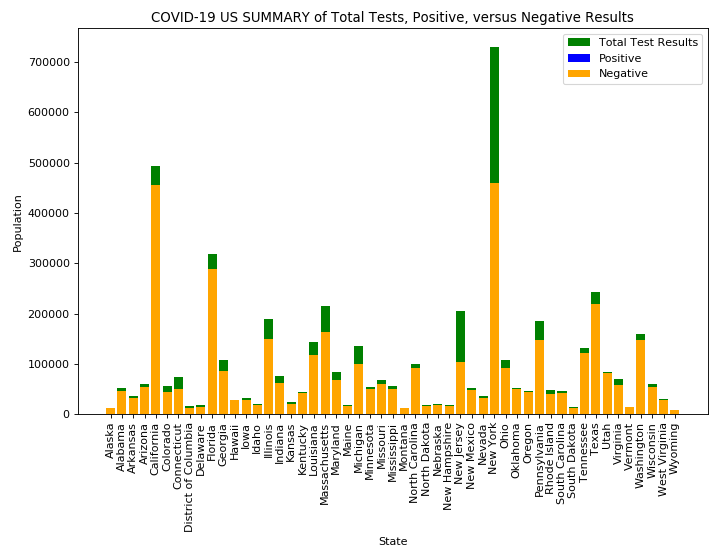

In [32]:
##   ----- PRESENTATION SLIDE -----   ##

## CHART:  COVID-19 US SUMMARY of Total Test Results, Positive, versus Negative.

# Set x axis and tick locations
x_axis = np.arange(len(COV_Tracking_US_Summary_data_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(9,7))

#Plot bars...
plt.bar(x_axis, COV_Tracking_US_Summary_data_df["Total_Test_Results"], color='green', align="center")
plt.xticks(tick_locations, COV_Tracking_US_Summary_data_df["State"], rotation="vertical")
plt.bar(x_axis, COV_Tracking_US_Summary_data_df["Positive"], color='blue', align="center")
plt.xticks(tick_locations, COV_Tracking_US_Summary_data_df["State"], rotation="vertical")
plt.bar(x_axis, COV_Tracking_US_Summary_data_df["Negative"], color='orange', align="center")
plt.xticks(tick_locations, COV_Tracking_US_Summary_data_df["State"], rotation="vertical")

# Set a Title and labels
plt.title("COVID-19 US SUMMARY of Total Tests, Positive, versus Negative Results")
plt.xlabel("State")
plt.ylabel("Population")
plt.legend(["Total Test Results","Positive", "Negative"], loc='upper right')
#plt.grid()
#plt.yscale("log")

# Save chart to file 
plt.savefig("Images/COVID_19_US_SUMMARY_of_TotalTests_Positive_versus_Negative_Results.png") 

# Display figure
plt.show()
plt.tight_layout()

## QUESTION: For COVID-19 Nationally
## How does the population of the State, Total Test Results, and Deaths compare?

<IPython.core.display.Javascript object>


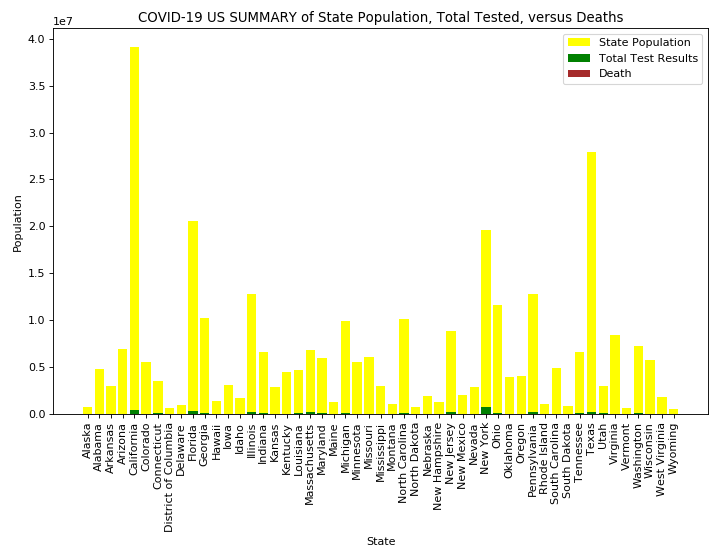

In [33]:
##   ----- PRESENTATION SLIDE -----   ##

## CHART:  COVID-19 US SUMMARY of State Population, Total Test Results, versus Deaths.

# Set x axis and tick locations
x_axis = np.arange(len(COV_Tracking_US_Summary_data_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(9,7))

#Plot bars...
plt.bar(x_axis, COV_Tracking_US_Summary_data_df["State Population"], color='Yellow', align="center")
plt.xticks(tick_locations, COV_Tracking_US_Summary_data_df["State"], rotation="vertical")
plt.bar(x_axis, COV_Tracking_US_Summary_data_df["Total_Test_Results"], color='green', align="center")
plt.xticks(tick_locations, COV_Tracking_US_Summary_data_df["State"], rotation="vertical")
plt.bar(x_axis, COV_Tracking_US_Summary_data_df["Death"], color='brown', align="center")
plt.xticks(tick_locations, COV_Tracking_US_Summary_data_df["State"], rotation="vertical")

# Set a Title and labels
plt.title("COVID-19 US SUMMARY of State Population, Total Tested, versus Deaths")
plt.xlabel("State")
plt.ylabel("Population")
plt.legend(["State Population","Total Test Results", "Death"], loc='upper right')
#plt.grid()
#plt.yscale("log")

# Save chart to file 
plt.savefig("Images/COVID_19_US_SUMMARY_of_StatePopulation_TotalTested_versus_Deaths.png") 

# Display figure
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


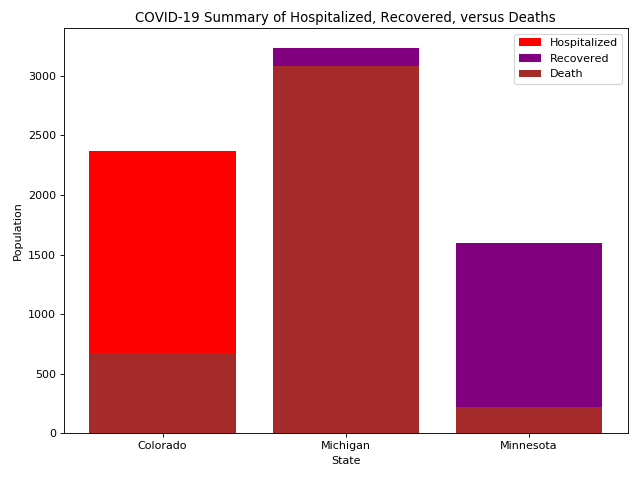

In [34]:
## CHART:  COVID-19 Minnesota, Michigan, Colorado, SUMMARY of Hospitalized, Recovered, versus Deaths.

# Set x axis and tick locations
x_axis = np.arange(len(state_columns_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,6))

#Plot bars...
plt.bar(x_axis, state_columns_df["Hospitalized"], color='red', align="center")
plt.xticks(tick_locations, state_columns_df["State"], rotation="vertical")
plt.bar(x_axis, state_columns_df["Recovered"], color='purple', align="center")
plt.xticks(tick_locations, state_columns_df["State"], rotation="vertical")
plt.bar(x_axis, state_columns_df["Death"], color='brown', align="center")
plt.xticks(tick_locations, state_columns_df["State"], rotation="horizontal")

# Set a Title and labels
plt.title("COVID-19 Summary of Hospitalized, Recovered, versus Deaths")
plt.xlabel("State")
plt.ylabel("Population")
plt.legend(["Hospitalized","Recovered", "Death"], loc='upper right')
#plt.grid()
#plt.yscale("log")

# Save chart to file 
plt.savefig("Images/COVID_19_MN_MI_CO_SUMMARY_of_Hospitalized_Recovered_versus_Deaths_b.png") 

# Display figure
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


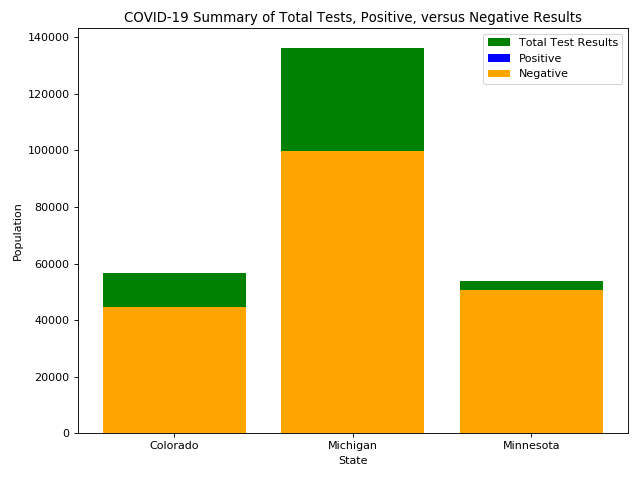

In [35]:
## CHART:  COVID-19 Minnesota, Michigan, Colorado, SUMMARY of Total Test Results, Positive, versus Negative.

# Set x axis and tick locations
x_axis = np.arange(len(state_columns_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,6))

# Plot bars...
plt.bar(x_axis, state_columns_df["Total_Test_Results"], color='green', align="center")
plt.xticks(tick_locations, state_columns_df["State"], rotation="vertical")
plt.bar(x_axis, state_columns_df["Positive"], color='blue', align="center")
plt.xticks(tick_locations, state_columns_df["State"], rotation="vertical")
plt.bar(x_axis, state_columns_df["Negative"], color='orange', align="center")
plt.xticks(tick_locations, state_columns_df["State"], rotation="horizontal")

# Set a Title and labels
plt.title("COVID-19 Summary of Total Tests, Positive, versus Negative Results")
plt.xlabel("State")
plt.ylabel("Population")
plt.legend(["Total Test Results","Positive", "Negative"], loc='upper right')
#plt.grid()
#plt.yscale("log")

# Save chart to file 
plt.savefig("Images/COVID_19_MN_MI_CO_SUMMARY_of_TotalTests_Positive_versus_Negative_Results_b.png") 

# Display figure
plt.show()
plt.tight_layout()

## QUESTION: For COVID-19 States of Minnesota, Michigan, and Colorado
## How does the population of the State, Total Test Results, and Deaths compare?

<IPython.core.display.Javascript object>


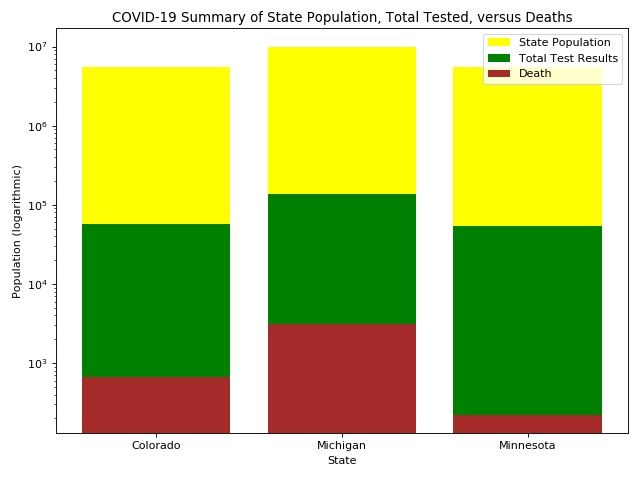

In [36]:
##   ----- PRESENTATION SLIDE -----   ##

## CHART:  COVID-19 Minnesota, Michigan, Colorado, SUMMARY of State Population, Total Test Results, versus Deaths.

# Set x axis and tick locations
x_axis = np.arange(len(state_columns_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,6))

#Plot bars...
plt.bar(x_axis, state_columns_df["State Population"], color='yellow', align="center")
plt.xticks(tick_locations, state_columns_df["State"], rotation="vertical")
plt.bar(x_axis, state_columns_df["Total_Test_Results"], color='green', align="center")
plt.xticks(tick_locations, state_columns_df["State"], rotation="vertical")
plt.bar(x_axis, state_columns_df["Death"], color='brown', align="center")
plt.xticks(tick_locations, state_columns_df["State"], rotation="horizontal")

# Set a Title and labels
plt.title("COVID-19 Summary of State Population, Total Tested, versus Deaths")
plt.xlabel("State")
plt.ylabel("Population (logarithmic)")
plt.legend(["State Population","Total Test Results", "Death"], loc='upper right')
#plt.grid()
plt.yscale("log")

# Save chart to file 
plt.savefig("Images/COVID_19_MN_MI_CO_SUMMARY_of_StatePopulation_TotalTested_versus_Deaths_b.png") 

# Display figure
plt.show()
plt.tight_layout()

## QUESTION: For COVID-19 States of Minnesota, Michigan, and Colorado
## How does the population of the Positive, Negative, Total Test Results, Hospitalizations, Recovered, and Deaths compare?

<IPython.core.display.Javascript object>


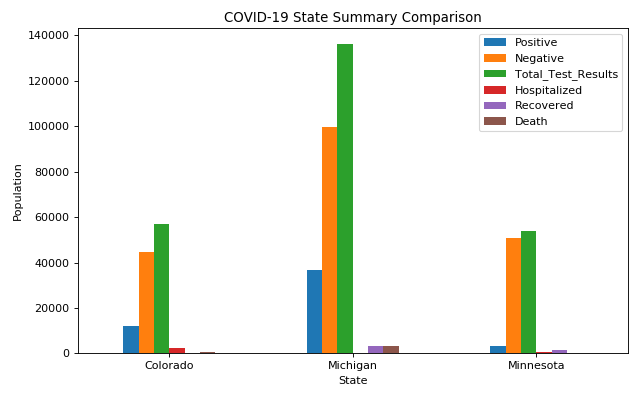

In [37]:
##   ----- PRESENTATION SLIDE -----   ##

## CHART:  COVID-19 Minnesota, Michigan, Colorado, SUMMARY of Total Test Results, Positive, versus Negative.

state_comparison_df=state_columns_df[["State","Positive","Negative","Total_Test_Results","Hospitalized","Recovered","Death"]]

# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = state_comparison_df.plot(kind="bar", figsize=(8,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(state_comparison_df["State"], rotation=0)

# Set a Title and labels
plt.title("COVID-19 State Summary Comparison")
plt.xlabel("State")
plt.ylabel("Population")
#plt.grid()
#plt.legend(handles=["Hospitalized","Recovered", "Death"], loc="best")
#plt.yscale("log")

# Save chart to file 
plt.savefig("Images/COVID_19_MN_MI_CO_Summary_Comparision.png") 

# Display figure
plt.show()
plt.tight_layout()

## QUESTION: For COVID-19 States of Minnesota, Michigan, and Colorado
## How does the population of the Positive, Negative, and Total Test Results compare?

<IPython.core.display.Javascript object>


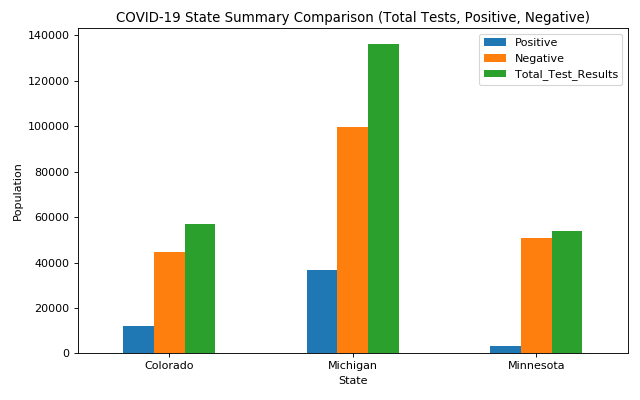

In [38]:
##   ----- PRESENTATION SLIDE -----   ##

## CHART:  COVID-19 Minnesota, Michigan, Colorado, SUMMARY of Total Test Results, Positive, versus Negative.

state_comparison_posnegtl_df=state_columns_df[["State","Positive","Negative","Total_Test_Results"]]

# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = state_comparison_posnegtl_df.plot(kind="bar", figsize=(8,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(state_comparison_posnegtl_df["State"], rotation=0)

# Set a Title and labels
plt.title("COVID-19 State Summary Comparison (Total Tests, Positive, Negative)")
plt.xlabel("State")
plt.ylabel("Population")
#plt.grid()
#plt.legend(handles=["Hospitalized","Recovered", "Death"], loc="best")
#plt.yscale("log")

# Save chart to file 
plt.savefig("Images/COVID_19_MN_MI_CO_Summary_Comparision_Tests_Positive_Negative.png") 

# Display figure
plt.show()
plt.tight_layout()

## QUESTION: For COVID-19 States of Minnesota, Michigan, and Colorado
## How does the population of the Hospitalizations, Recovered, and Deaths compare?

<IPython.core.display.Javascript object>


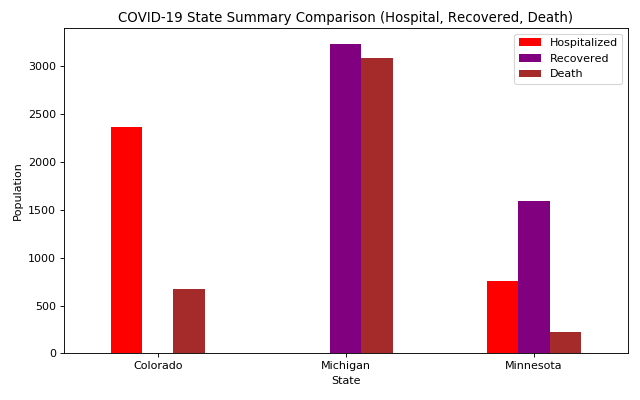

In [39]:
##   ----- PRESENTATION SLIDE -----   ##

## CHART:  COVID-19 Minnesota, Michigan, Colorado, SUMMARY of Hospitalized, Recovered, versus Deaths.

state_comparison_hosrcvrdeath_df=state_columns_df[["State","Hospitalized","Recovered","Death"]]

# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = state_comparison_hosrcvrdeath_df.plot(kind="bar", color=['red','purple','brown'], figsize=(8,5))
my_colors='r' #red,purple,brown...


# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(state_comparison_hosrcvrdeath_df["State"], rotation=0)

# Set a Title and labels
plt.title("COVID-19 State Summary Comparison (Hospital, Recovered, Death)")
plt.xlabel("State")
plt.ylabel("Population")
#plt.grid()
#plt.legend(handles=["Hospitalized","Recovered", "Death"], loc="best")
#plt.yscale("log")

# Save chart to file 
plt.savefig("Images/COVID_19_MN_MI_CO_Summary_Comparision_hospital_recovered_death.png") 

# Display figure
plt.show()
plt.tight_layout()

## QUESTION: For COVID-19 States of Minnesota, Michigan, and Colorado
## How does the population of the Positive, Negative, Total Test Results, Hospitalizations, Recovered, and Deaths compare? Here is a look at the data:

In [40]:
# Display the States Comparision to terminal
state_columns_df

,State,State Abbreviation,State Population,Positive,Negative,Total_Test_Results,Hospitalized,Recovered,Death,Date_Checked
5,Colorado,CO,5531141.0,12256,44533,56789,2366.0,0.0,674,2020-04-25T02:32:00Z
22,Michigan,MI,9957488.0,36641,99655,136296,0.0,3237.0,3085,2020-04-24T20:17:00Z
23,Minnesota,MN,5527358.0,3185,50602,53787,756.0,1594.0,221,2020-04-24T21:03:00Z


In [41]:
State_columns_df=state_columns_df[['State','State Population','Total_Test_Results','Positive','Negative','Hospitalized','Recovered','Death']]
State_columns_df

,State,State Population,Total_Test_Results,Positive,Negative,Hospitalized,Recovered,Death
5,Colorado,5531141.0,56789,12256,44533,2366.0,0.0,674
22,Michigan,9957488.0,136296,36641,99655,0.0,3237.0,3085
23,Minnesota,5527358.0,53787,3185,50602,756.0,1594.0,221


## Write DataFrames Prepared for Charting saved to CSV Files

In [42]:
## Save Files to Output Folder called Output_Chart_DataFrames...
# Safety measure...

Census_State_Population_df.to_csv('Output_Chart_DataFrames/Chart_Census_state_Population_df.csv', encoding='utf-8', index=False)
Census_County_Population_df.to_csv('Output_Chart_DataFrames/Chart_Census_County_Population_df.csv', encoding='utf-8', index=False)
COV_Tracking_MN_History_data_df.to_csv('Output_Chart_DataFrames/Chart_COV_Tracking_MN_History_data_df.csv', encoding='utf-8', index=False)
COV_Tracking_US_History_data_df.to_csv('Output_Chart_DataFrames/Chart_COV_Tracking_US_History_data_df.csv', encoding='utf-8', index=False)
COV_Tracking_MN_Summary_data_df.to_csv('Output_Chart_DataFrames/Chart_COV_Tracking_MN_Summary_data_df.csv', encoding='utf-8', index=False)
COV_Tracking_US_Summary_data_df.to_csv('Output_Chart_DataFrames/Chart_COV_Tracking_US_Summary_data_df.csv', encoding='utf-8', index=False)
JHU_data_df.to_csv('Output_Chart_DataFrames/Chart_JHU_data_df.csv', encoding='utf-8', index=False)
state_columns_df.to_csv('Output_Chart_DataFrames/state_columns_df.csv', encoding='utf-8', index=False)
state_comparison_df.to_csv('Output_Chart_DataFrames/state_comparison_df.csv', encoding='utf-8', index=False)
state_comparison_posnegtl_df.to_csv('Output_Chart_DataFrames/state_comparison_posnegtl_df.csv', encoding='utf-8', index=False)
state_comparison_hosrcvrdeath_df.to_csv('Output_Chart_DataFrames/state_comparison_hosrcvrdeath_df.csv', encoding='utf-8', index=False)

## EOF 